In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Reading in the Data

In [3]:
yac_data = pd.read_csv("~/Desktop/CoverageNet/src/03_coverageNet/02_score_attempt/outputs/interception_training_tensor.csv")

In [4]:
yac_data.head(20)

,group,gameId,playId,defense_nflId,offense_nflId,playId3,playId2,defenseId,offenseId,defense_s_x,...,receiver_s_x,receiver_s_y,receiver_distance_from_los,defense_football_x,defense_football_y,receiver_football_x,receiver_football_y,football_s,receiver_football_defender_dist_diff,defender_receiver_football_dist_diff
0,test,2018090600,3392,79848,310,1,1,1,1,-1.821280,...,5.873921,4.300635,8.31,0.22,-3.98,14.68,16.43,19.25,-2.980322,-18.046793
1,test,2018090600,3392,79848,2533040,1,1,1,2,-1.821280,...,5.873921,4.300635,8.31,0.22,-3.98,14.68,16.43,19.25,-2.980322,-18.046793
2,test,2018090600,3392,79848,2543583,1,1,1,3,-1.821280,...,5.873921,4.300635,8.31,0.22,-3.98,14.68,16.43,19.25,-2.980322,-18.046793
3,test,2018090600,3392,79848,2555415,1,1,1,4,-1.821280,...,5.873921,4.300635,8.31,0.22,-3.98,14.68,16.43,19.25,-2.980322,-18.046793
4,test,2018090600,3392,79848,2560854,1,1,1,5,-1.821280,...,5.873921,4.300635,8.31,0.22,-3.98,14.68,16.43,19.25,-2.980322,-18.046793
5,test,2018090600,3392,2495613,310,1,1,2,1,-1.863472,...,5.873921,4.300635,8.31,15.03,-6.34,14.68,16.43,19.25,-0.739821,-5.720404
6,test,2018090600,3392,2495613,2533040,1,1,2,2,-1.863472,...,5.873921,4.300635,8.31,15.03,-6.34,14.68,16.43,19.25,-0.739821,-5.720404
7,test,2018090600,3392,2495613,2543583,1,1,2,3,-1.863472,...,5.873921,4.300635,8.31,15.03,-6.34,14.68,16.43,19.25,-0.739821,-5.720404
8,test,2018090600,3392,2495613,2555415,1,1,2,4,-1.863472,...,5.873921,4.300635,8.31,15.03,-6.34,14.68,16.43,19.25,-0.739821,-5.720404
9,test,2018090600,3392,2495613,2560854,1,1,2,5,-1.863472,...,5.873921,4.300635,8.31,15.03,-6.34,14.68,16.43,19.25,-0.739821,-5.720404


In [5]:
yac_data.shape

(43230, 29)

In [6]:
target_data = pd.read_csv("~/Desktop/CoverageNet/src/03_coverageNet/02_score_attempt/outputs/interception_training_target.csv")

In [7]:
target_data.head(10)

,group,gameId,playId,playId2,playId3,offensePlayResult,offensePlayResult_adj
0,test,2018090600,3392,1,1,11,11
1,test,2018090600,3481,2,2,-2,-2
2,test,2018090905,1646,3,16,42,42
3,test,2018091000,2735,4,24,-7,-7
4,test,2018091300,3685,5,30,28,28
5,test,2018091604,608,6,37,-24,-24
6,test,2018091700,1147,7,47,38,38
7,test,2018091700,3637,8,49,-46,-46
8,test,2018092301,3690,9,52,-29,-29
9,test,2018092302,3475,10,55,43,43


# Formatting the Data

In [8]:
yac_data.columns

Index(['group', 'gameId', 'playId', 'defense_nflId', 'offense_nflId',
       'playId3', 'playId2', 'defenseId', 'offenseId', 'defense_s_x',
       'defense_s_y', 'defense_receiver_x', 'defense_receiver_y',
       'defense_receiver_s_x', 'defense_receiver_s_y', 'defense_offense_x',
       'defense_offense_y', 'defense_offense_s_x', 'defense_offense_s_y',
       'receiver_s_x', 'receiver_s_y', 'receiver_distance_from_los',
       'defense_football_x', 'defense_football_y', 'receiver_football_x',
       'receiver_football_y', 'football_s',
       'receiver_football_defender_dist_diff',
       'defender_receiver_football_dist_diff'],
      dtype='object')

In [9]:
def create_x(data, nfeatures):
    # creating a numpy tensor to hold the play data
    np_mat = np.array(data.drop(['group', 'gameId', 'playId', 'playId3','defense_nflId', 'offense_nflId'],
                               axis = 1))
    
    # setting parameters
    ngames = np.max(np.array(data['playId2']))
    nDef = 11
    nOff = 10
    
    # initializing the tensor
    np_tensor = np.zeros((ngames, nDef, nOff, nfeatures))
    
    for row in range(len(np_mat)):
        np_tensor[int(np_mat[row][0]) - 1][int(np_mat[row][1]) - 1][int(np_mat[row][2]) - 1] = np_mat[row][3:]
    
    np_tensor = np_tensor.astype('float32')
    
    return(np_tensor)

In [10]:
X_train = create_x(data = yac_data[yac_data["group"] == "training"],
                  nfeatures = 20)

In [11]:
X_train.shape

(550, 11, 10, 20)

In [12]:
X_train[0][0][0]

array([ 0.05744928, -3.0194535 ,  1.57      , -0.62      , -3.5260618 ,
        0.6514248 ,  9.7       , 11.24      , -1.5077093 , -1.2799482 ,
        3.583511  , -3.6708784 ,  5.51      , 14.19      , 12.2       ,
       12.62      , 12.82      ,  0.5       , 16.301365  ,  0.7241748 ],
      dtype=float32)

In [13]:
X_validation = create_x(data = yac_data[(yac_data["group"] == "validation")&(yac_data["gameId"] < 20000000000)],
                  nfeatures = 20)

In [14]:
X_validation.shape

(59, 11, 10, 20)

In [15]:
X_validation[0][0][0]

array([-0.08405993, -5.069303  ,  2.39      ,  1.72      ,  0.42095637,
       -0.21550474, 19.68      , -4.3       ,  0.91263175, -1.2264519 ,
       -0.50501627, -4.8537984 ,  6.91      , 19.6       , -4.25      ,
       17.21      , -5.97      ,  5.45      , 15.271493  ,  1.8394212 ],
      dtype=float32)

In [16]:
X_test = create_x(data = yac_data[(yac_data["group"] == "test")&(yac_data["gameId"] < 20000000000)],
                  nfeatures = 20)

In [17]:
X_test.shape

(59, 11, 10, 20)

In [18]:
X_test[0][0][0]

array([ -1.8212798 ,   0.2618015 , -14.46      , -20.41      ,
        -7.6952004 ,  -4.038833  ,   2.31      ,  -2.82      ,
        -1.2171696 ,  -0.44527063,   5.8739204 ,   4.3006344 ,
         8.31      ,   0.22      ,  -3.98      ,  14.68      ,
        16.43      ,  19.25      ,  -2.980322  , -18.046793  ],
      dtype=float32)

In [19]:
def create_y(data):
    targets = np.array(data["offensePlayResult_adj"])
    
    y = np.zeros((targets.shape[0], 199))
    for idx, target in enumerate(list(targets)):
        y[idx][99 + target] = 1
    
    return(y)

In [20]:
y_train = create_y(data = target_data[(target_data["group"] == "training")])

In [21]:
y_train.shape

(550, 199)

In [22]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
y_validation = create_y(data = target_data[(target_data["group"] == "validation")&(target_data["gameId"] < 20000000000)])

In [24]:
y_validation.shape

(59, 199)

In [25]:
y_test = create_y(data = target_data[(target_data["group"] == "test") & (target_data["gameId"] < 20000000000)])

In [26]:
y_test.shape

(59, 199)

In [27]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Training a Convolutional Neural Network Model

In [28]:
model = tf.keras.Sequential()

In [29]:
# first convolutional neural network
model.add(layers.Conv2D(50, 
                        kernel_size=(1,1), 
                        strides=(1,1), 
                        input_shape = (11,10,20)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(100, 
                        kernel_size=(1,1), 
                        strides=(1,1)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(50, 
                        kernel_size=(1,1), 
                        strides=(1,1)))
model.add(layers.Activation('relu'))

import tensorflow.keras.backend as K

def channelPool(x):
    return .5*K.max(x,axis=2) + .5*K.mean(x,axis=2)

model.add(layers.Lambda(channelPool))

In [30]:
# second convolutional neural network
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(50, 
                        kernel_size=1, 
                        strides=1))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(100, 
                        kernel_size=1, 
                        strides=1))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Conv1D(50, 
                        kernel_size=1, 
                        strides=1))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
# model.add(layers.AvgPool2D(pool_size=(11, 1)))

def channelPool(x):
    return .5*K.max(x,axis=1) + .5*K.mean(x,axis=1)

model.add(layers.Lambda(channelPool))

In [31]:
model.add(layers.Flatten())
model.add(layers.Dense(96))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(199))
model.add(layers.Activation('softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 10, 50)        1050      
_________________________________________________________________
activation (Activation)      (None, 11, 10, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 10, 100)       5100      
_________________________________________________________________
activation_1 (Activation)    (None, 11, 10, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 10, 50)        5050      
_________________________________________________________________
activation_2 (Activation)    (None, 11, 10, 50)        0         
_________________________________________________________________
lambda (Lambda)              (None, 11, 50)            0

In [33]:
import tensorflow.keras.backend as K
def crps(y_true, y_pred):
    y_pred =  K.cumsum(y_pred, axis=1)
    ym =  K.cast(K.reshape(K.argmax(y_true, axis=1) - 99, (-1, 1)), 
        dtype='int32')
    n = K.arange(-99, 100)
    step = K.cast(K.greater_equal(n - ym, 0), dtype='float32')
    return K.mean(K.sum(K.square(y_pred - step), axis=1)) / 199

In [34]:
from tensorflow.keras.callbacks import EarlyStopping,  ModelCheckpoint

In [35]:
from tensorflow.keras.optimizers import Adam
model.compile(loss=[crps], metrics=[crps], optimizer='adam')

In [36]:
history = model.fit(X_train, y_train,
                   validation_data = (X_validation, y_validation),
                   # batch_size = 64,
                   epochs = 25,
                   verbose = 1)

Epoch 1/25
18/18 [==============================] - 1s 64ms/step - loss: 0.0884 - crps: 0.0880 - val_loss: 0.0926 - val_crps: 0.0928
Epoch 2/25
18/18 [==============================] - 0s 26ms/step - loss: 0.0719 - crps: 0.0730 - val_loss: 0.0893 - val_crps: 0.0894
Epoch 3/25
18/18 [==============================] - 0s 26ms/step - loss: 0.0617 - crps: 0.0610 - val_loss: 0.0843 - val_crps: 0.0844
Epoch 4/25
18/18 [==============================] - 0s 25ms/step - loss: 0.0565 - crps: 0.0558 - val_loss: 0.0780 - val_crps: 0.0781
Epoch 5/25
18/18 [==============================] - 0s 25ms/step - loss: 0.0553 - crps: 0.0552 - val_loss: 0.0720 - val_crps: 0.0721
Epoch 6/25
18/18 [==============================] - 0s 26ms/step - loss: 0.0527 - crps: 0.0529 - val_loss: 0.0665 - val_crps: 0.0666
Epoch 7/25
18/18 [==============================] - 0s 26ms/step - loss: 0.0529 - crps: 0.0528 - val_loss: 0.0627 - val_crps: 0.0628
Epoch 8/25
18/18 [==============================] - 0s 28ms/step - lo

In [37]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0676 - crps: 0.0675


[0.06763791292905807, 0.06750909984111786]

# Examining Results

The plays analyzed are part of the holdout set, so the CNN model did not ever see the data in training, or indirectly through optimizing the crps of the cross-validation set.

### Play that Went For Negative Yardage

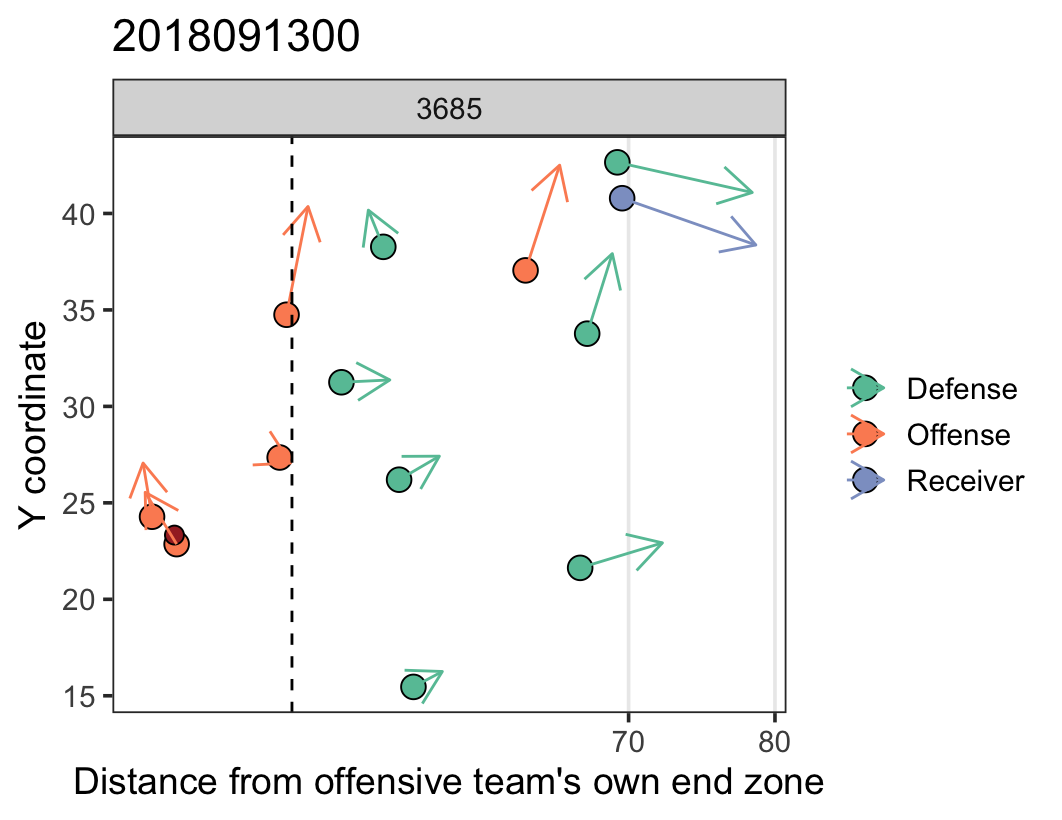

In [38]:
yac_data[(yac_data["gameId"] == 2018091300) & (yac_data["playId"] == 3685)]["playId2"].iloc[0]

5

In [39]:
yards = target_data[(target_data["gameId"] == 2018091300) & (target_data["playId"] == 3685)]["offensePlayResult"].iloc[0]
print("The actual result of the play was a " + str(yards) + " gain.")

The actual result of the play was a 28 gain.


In [40]:
np.argmax(y_test[5-1]) - 99

28

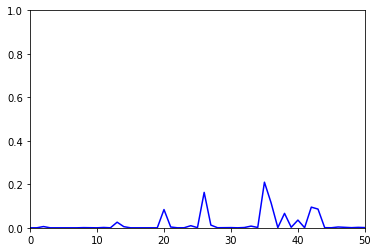

In [42]:
plt.plot(np.arange(-99,100), model.predict(X_test)[4], 'b-')
plt.xlim(0,50)
plt.ylim(0,1)
plt.show()

In [43]:
# yardage prediction
model.predict(X_test)[4].dot(np.arange(-99,100))

32.48871237975172

### Play that Went For No Yardage

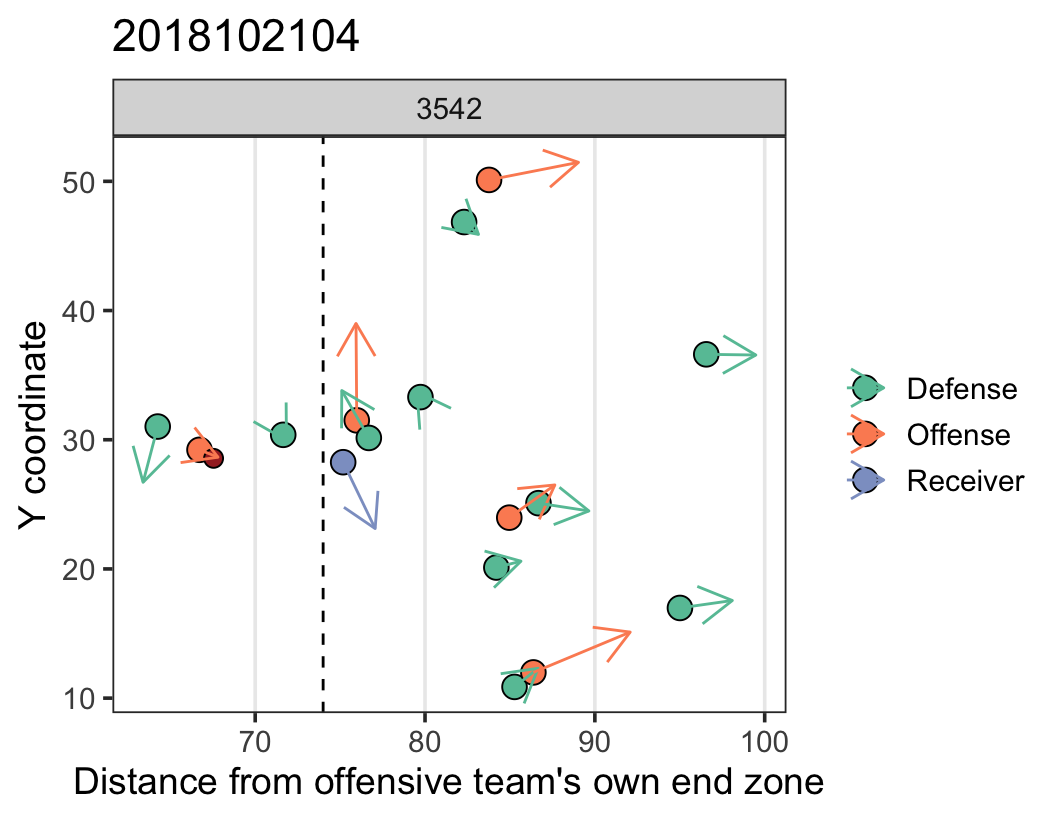

In [44]:
yac_data[(yac_data["gameId"] == 2018102104) & (yac_data["playId"] == 3542)]["playId2"].iloc[0]

27

In [45]:
yards = target_data[(target_data["gameId"] == 2018102104) & (target_data["playId"] == 3542)]["offensePlayResult"].iloc[0]
print("The actual result of the play was a " + str(yards) + " gain.")

The actual result of the play was a 0 gain.


In [46]:
np.argmax(y_test[27-1]) - 99

0

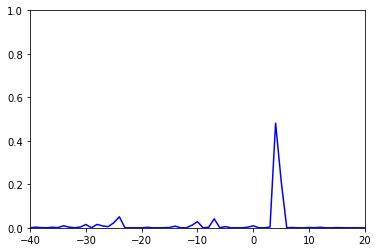

In [49]:
plt.plot(np.arange(-99,100), model.predict(X_test)[26], 'b-')
plt.xlim(-40,20)
plt.ylim(0,1)
plt.show()

In [50]:
# yardage prediction
model.predict(X_test)[26].dot(np.arange(-99,100))

-2.3346387303771223

### Play that Went For 10 Yards

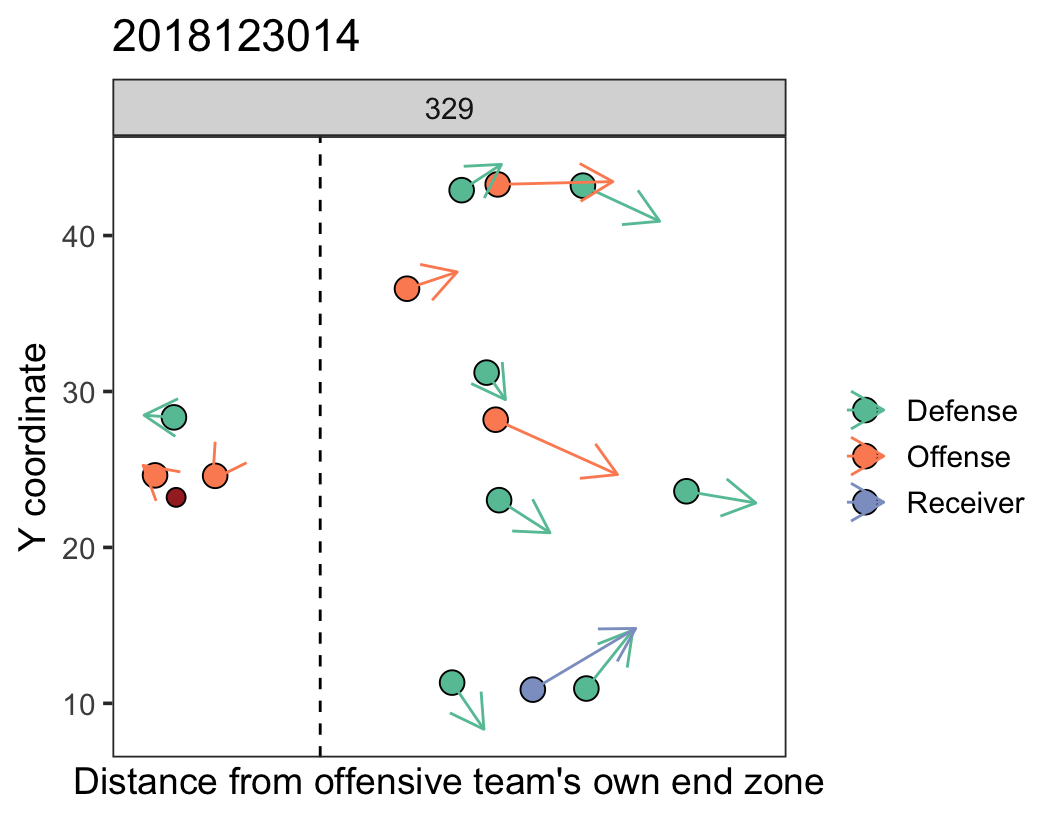

In [51]:
yac_data[(yac_data["gameId"] == 2018123014) & (yac_data["playId"] == 329)]["playId2"].iloc[0]

59

In [52]:
yards = target_data[(target_data["gameId"] == 2018123014) & (target_data["playId"] == 329)]["offensePlayResult"].iloc[0]
print("The actual result of the play was a " + str(yards) + " gain.")

The actual result of the play was a -12 gain.


In [53]:
np.argmax(y_test[59-1]) - 99

-12

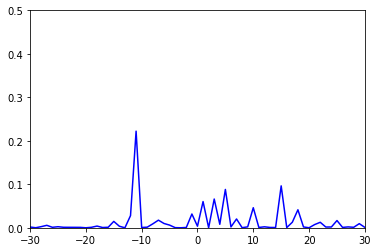

In [55]:
plt.plot(np.arange(-99,100), model.predict(X_test)[58], 'b-')
plt.xlim(-30,30)
plt.ylim(0,.5)
plt.show()

In [56]:
# yardage prediction
model.predict(X_test)[58].dot(np.arange(-99,100))

2.134997689674492

### Play that Went For 30+ Yards

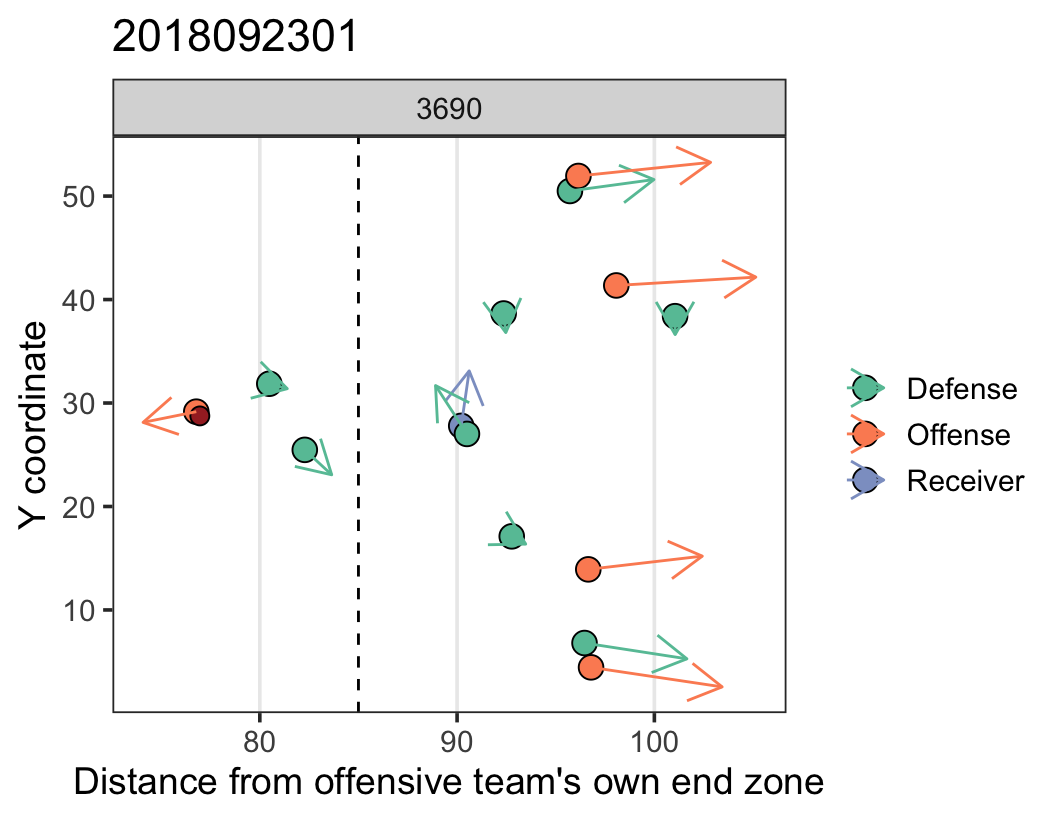

In [57]:
yac_data[(yac_data["gameId"] == 2018092301) & (yac_data["playId"] == 3690)]["playId2"].iloc[0]

9

In [58]:
yards = target_data[(target_data["gameId"] == 2018092301) & (target_data["playId"] == 3690)]["offensePlayResult"].iloc[0]
print("The actual result of the play was a " + str(yards) + " gain.")

The actual result of the play was a -29 gain.


In [59]:
np.argmax(y_test[9-1]) - 99

-29

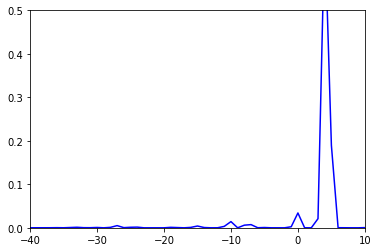

In [60]:
plt.plot(np.arange(-99,100), model.predict(X_test)[8], 'b-')
plt.xlim(-40,10)
plt.ylim(0,.5)
plt.show()

In [61]:
# yardage prediction
model.predict(X_test)[8].dot(np.arange(-99,100))

2.925759796793386

# Scoring Entire Data Set

In [66]:
pass_arrived_score = pd.read_csv("~/Desktop/CoverageNet/src/03_coverageNet/02_score_attempt/outputs/pass_attempt_score_tensor.csv")

In [67]:
pass_arrived_score.head(20)

,group,gameId,playId,defense_nflId,offense_nflId,playId2,defenseId,offenseId,defense_s_x,defense_s_y,...,receiver_s_x,receiver_s_y,receiver_distance_from_los,defense_football_x,defense_football_y,receiver_football_x,receiver_football_y,football_s,receiver_football_defender_dist_diff,defender_receiver_football_dist_diff
0,full,2018090600,75,79848,310,1,1,1,3.658502,-4.146837,...,2.749019,-1.454302,9.31,12.08,-11.36,16.21,-17.94,2.05,16.409923,-7.596262
1,full,2018090600,75,79848,2533040,1,1,2,3.658502,-4.146837,...,2.749019,-1.454302,9.31,12.08,-11.36,16.21,-17.94,2.05,16.409923,-7.596262
2,full,2018090600,75,79848,2543583,1,1,3,3.658502,-4.146837,...,2.749019,-1.454302,9.31,12.08,-11.36,16.21,-17.94,2.05,16.409923,-7.596262
3,full,2018090600,75,79848,2555415,1,1,4,3.658502,-4.146837,...,2.749019,-1.454302,9.31,12.08,-11.36,16.21,-17.94,2.05,16.409923,-7.596262
4,full,2018090600,75,79848,2559033,1,1,5,3.658502,-4.146837,...,2.749019,-1.454302,9.31,12.08,-11.36,16.21,-17.94,2.05,16.409923,-7.596262
5,full,2018090600,75,0,0,1,1,6,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000
6,full,2018090600,75,0,0,1,1,7,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000
7,full,2018090600,75,0,0,1,1,8,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000
8,full,2018090600,75,0,0,1,1,9,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000
9,full,2018090600,75,0,0,1,1,10,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000


In [68]:
pass_arrived_score.shape

(1894090, 28)

# Formatting the Data

In [69]:
pass_arrived_score.columns

Index(['group', 'gameId', 'playId', 'defense_nflId', 'offense_nflId',
       'playId2', 'defenseId', 'offenseId', 'defense_s_x', 'defense_s_y',
       'defense_receiver_x', 'defense_receiver_y', 'defense_receiver_s_x',
       'defense_receiver_s_y', 'defense_offense_x', 'defense_offense_y',
       'defense_offense_s_x', 'defense_offense_s_y', 'receiver_s_x',
       'receiver_s_y', 'receiver_distance_from_los', 'defense_football_x',
       'defense_football_y', 'receiver_football_x', 'receiver_football_y',
       'football_s', 'receiver_football_defender_dist_diff',
       'defender_receiver_football_dist_diff'],
      dtype='object')

In [70]:
def create_x(data, nfeatures):
    # creating a numpy tensor to hold the play data
    np_mat = np.array(data.drop(['group', 'gameId', 'playId','defense_nflId', 'offense_nflId'],
                               axis = 1))
    
    # setting parameters
    ngames = np.max(np.array(data['playId2']))
    nDef = 11
    nOff = 10
    
    # initializing the tensor
    np_tensor = np.zeros((ngames, nDef, nOff, nfeatures))
    
    for row in range(len(np_mat)):
        np_tensor[int(np_mat[row][0]) - 1][int(np_mat[row][1]) - 1][int(np_mat[row][2]) - 1] = np_mat[row][3:]
    
    np_tensor = np_tensor.astype('float32')
    
    return(np_tensor)

In [71]:
X_score = create_x(data = pass_arrived_score,
                  nfeatures = 20)

In [72]:
X_score.shape

(17219, 11, 10, 20)

In [73]:
X_score[0][0][0]

array([  3.6585023 ,  -4.146837  ,  -4.13      ,   6.58      ,
         0.90948343,  -2.6925352 ,  11.61      , -11.55      ,
         3.2822537 ,  -3.3958135 ,   2.749019  ,  -1.4543022 ,
         9.31      ,  12.08      , -11.36      ,  16.21      ,
       -17.94      ,   2.05      ,  16.409924  ,  -7.596262  ],
      dtype=float32)

# Saving Predictions

In [74]:
score_preds = model.predict(X_score)

In [75]:
score_preds[0]

array([8.18860310e-04, 1.24560634e-03, 4.52594104e-04, 2.45568983e-04,
       3.28213908e-04, 3.12522432e-04, 1.08408311e-03, 5.19003894e-04,
       6.14926161e-04, 1.78752191e-04, 4.12224443e-04, 2.13255465e-04,
       1.18695339e-03, 1.21578039e-03, 2.01913048e-04, 3.37880920e-04,
       7.81041628e-04, 1.21477444e-03, 5.19198715e-04, 6.41214661e-04,
       7.01372570e-04, 1.48080802e-03, 1.57485891e-03, 8.80174804e-04,
       6.70744455e-04, 2.11478182e-04, 4.62469063e-04, 1.04977738e-03,
       1.54877387e-04, 4.96271648e-04, 2.12142550e-04, 1.05997873e-03,
       7.64768221e-04, 7.46708014e-04, 1.68367784e-04, 1.71140989e-03,
       5.13861363e-04, 4.58081980e-04, 4.46120452e-04, 1.46349892e-03,
       6.24671520e-04, 6.98933378e-04, 5.34901570e-04, 8.92774144e-04,
       3.60316073e-04, 1.11476297e-03, 1.03022216e-03, 9.63669328e-04,
       1.26768439e-03, 1.24301994e-03, 2.07621045e-03, 5.84562426e-04,
       1.33574998e-03, 5.64840157e-04, 2.20253758e-04, 2.91050412e-03,
      

In [76]:
full_preds_df = pd.DataFrame(score_preds, columns = [str(int(x - 99)) for x in np.linspace(0,198, 199)])

In [77]:
full_preds_df.shape

(17219, 199)

In [78]:
full_preds_df2 = pd.concat([pass_arrived_score2[["gameId","playId"]].drop_duplicates().reset_index(), full_preds_df], axis = 1)
full_preds_df2 = full_preds_df2[full_preds_df2["gameId"] < 10000000000]
full_preds_df2 = full_preds_df2.drop(['index'], axis = 1)

In [79]:
full_preds_df2.shape

(17219, 201)

In [80]:
full_preds_df2.head(10)

,gameId,playId,-99,-98,-97,-96,-95,-94,-93,-92,...,90,91,92,93,94,95,96,97,98,99
0,2018090600,75,0.000819,0.001246,0.000453,0.000246,0.000328,0.000313,0.001084,0.000519,...,0.000606,0.000676,0.000188,0.000613,0.000384,0.000408,0.000512,0.000654,0.000877,0.000328
1,2018090600,146,0.000258,0.000562,0.000130,0.000177,0.000156,0.000219,0.000433,0.000231,...,0.000153,0.000205,0.000079,0.000173,0.000197,0.000551,0.000152,0.000204,0.000378,0.000077
2,2018090600,168,0.000109,0.002245,0.000458,0.000754,0.000612,0.000394,0.000259,0.000384,...,0.000694,0.000502,0.000158,0.000472,0.000403,0.000579,0.000377,0.000428,0.000828,0.000218
3,2018090600,190,0.000877,0.000629,0.000382,0.000679,0.000224,0.000245,0.000136,0.001136,...,0.000638,0.000767,0.001837,0.000562,0.000574,0.000522,0.000489,0.001754,0.000449,0.000580
4,2018090600,256,0.000149,0.000550,0.000190,0.000265,0.000296,0.000369,0.000294,0.000206,...,0.000415,0.000199,0.000136,0.000214,0.000214,0.000334,0.000107,0.000279,0.000496,0.000110
5,2018090600,320,0.000371,0.000924,0.000437,0.000473,0.000590,0.000303,0.000251,0.000430,...,0.000848,0.000343,0.000090,0.000274,0.000401,0.000299,0.000429,0.000351,0.001115,0.000460
6,2018090600,344,0.000366,0.000315,0.000209,0.000305,0.000342,0.000184,0.000427,0.000319,...,0.000596,0.000216,0.000038,0.000120,0.000189,0.000288,0.000239,0.000264,0.000480,0.000554
7,2018090600,402,0.000377,0.000067,0.000075,0.000099,0.000072,0.000035,0.000236,0.000112,...,0.000093,0.000036,0.000041,0.000066,0.000047,0.000203,0.000174,0.000113,0.000142,0.000220
8,2018090600,492,0.000072,0.001872,0.000539,0.001182,0.001023,0.000554,0.000318,0.000423,...,0.000536,0.000825,0.000200,0.000459,0.000349,0.000548,0.000295,0.000465,0.000474,0.000256
9,2018090600,521,0.000506,0.000549,0.000209,0.000316,0.000172,0.000281,0.000526,0.000312,...,0.000347,0.000387,0.000087,0.000294,0.000162,0.001060,0.000446,0.000764,0.000549,0.000225


In [81]:
full_preds_df3 = pd.melt(full_preds_df2, 
        id_vars=['gameId', 'playId'], 
        value_vars=[str(int(x - 99)) for x in np.linspace(0,198, 199)],
        var_name='offensePlayResult', 
        value_name='probability')

full_preds_df3["offensePlayResult"] = [int(x) for x in np.array(full_preds_df3["offensePlayResult"])]
full_preds_df3 = full_preds_df3.sort_values(['gameId','playId','offensePlayResult'])

In [82]:
full_preds_df3.head(10)

,gameId,playId,offensePlayResult,probability
0,2018090600,75,-99,0.000819
17219,2018090600,75,-98,0.001246
34438,2018090600,75,-97,0.000453
51657,2018090600,75,-96,0.000246
68876,2018090600,75,-95,0.000328
86095,2018090600,75,-94,0.000313
103314,2018090600,75,-93,0.001084
120533,2018090600,75,-92,0.000519
137752,2018090600,75,-91,0.000615
154971,2018090600,75,-90,0.000179


In [83]:
full_preds_df3.shape

(3426581, 4)

In [84]:
full_preds_df3.to_csv("~/Desktop/CoverageNet/src/03_coverageNet/02_score_attempt/outputs/interceptions_yards_probs.csv", 
                        index = False)

In [85]:
# saving model
model.save('interceptions_yards_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: interceptions_yards_model/assets
